In [1]:
from sys import executable
!{executable} -m pip install numpy pandas seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

/usr/local/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
%matplotlib inline
register_matplotlib_converters()
sns.set(context='notebook', style='darkgrid')
pd.set_option('display.float_format', lambda x: f'{x :.2f}')
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [5]:
feat_df = pd.read_csv('data/features.csv')
feat_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,False
1,1,2010-02-12,38.51,2.55,nan,nan,nan,nan,nan,211.24,8.11,True
2,1,2010-02-19,39.93,2.51,nan,nan,nan,nan,nan,211.29,8.11,False
3,1,2010-02-26,46.63,2.56,nan,nan,nan,nan,nan,211.32,8.11,False
4,1,2010-03-05,46.50,2.62,nan,nan,nan,nan,nan,211.35,8.11,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.64,4842.29,975.03,3.00,2449.97,3169.69,nan,nan,False
8186,45,2013-07-05,77.50,3.61,9090.48,2268.58,582.74,5797.47,1514.93,nan,nan,False
8187,45,2013-07-12,79.37,3.61,3789.94,1827.31,85.72,744.84,2150.36,nan,nan,False
8188,45,2013-07-19,82.84,3.74,2961.49,1047.07,204.19,363.00,1059.46,nan,nan,False


In [6]:
stores_df = pd.read_csv('data/stores.csv')
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
df = pd.read_csv('data/train.csv')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [8]:
df = pd.merge(df, feat_df, on=['Date', 'Store', 'IsHoliday'])
df = pd.merge(df, stores_df, on=['Store'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.week
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df['Year_Week'] = df.Date.dt.strftime('%Y_%W')

df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Year_Week
0,1,1,2010-02-05,24924.50,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
1,1,2,2010-02-05,50605.27,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
2,1,3,2010-02-05,13740.12,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
3,1,4,2010-02-05,39954.04,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
4,1,5,2010-02-05,32229.38,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421566,45,94,2012-10-26,5203.31,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421567,45,95,2012-10-26,56017.47,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421568,45,97,2012-10-26,6817.48,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43


In [10]:
weeks_train = df.Year_Week.sort_values().unique()[:-39].tolist()
train = df[df.Year_Week.isin(weeks_train)].drop(['Year_Week'], axis=1)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418931,45,93,2012-01-27,1397.34,False,37.93,3.57,1890.49,2618.49,nan,139.07,5692.74,189.52,8.42,B,118221,4,1,2012
418932,45,94,2012-01-27,3904.32,False,37.93,3.57,1890.49,2618.49,nan,139.07,5692.74,189.52,8.42,B,118221,4,1,2012
418933,45,95,2012-01-27,44521.65,False,37.93,3.57,1890.49,2618.49,nan,139.07,5692.74,189.52,8.42,B,118221,4,1,2012
418934,45,97,2012-01-27,5724.94,False,37.93,3.57,1890.49,2618.49,nan,139.07,5692.74,189.52,8.42,B,118221,4,1,2012


In [11]:
weeks_test = df.Year_Week.sort_values().unique()[-39:].tolist()
test = df[df.Year_Week.isin(weeks_test)].drop(['Year_Week'], axis=1)
test

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
7455,1,1,2012-02-03,23510.49,False,56.55,3.36,34577.06,3579.21,160.53,32403.87,5630.40,220.17,7.35,A,151315,5,2,2012
7456,1,2,2012-02-03,54322.24,False,56.55,3.36,34577.06,3579.21,160.53,32403.87,5630.40,220.17,7.35,A,151315,5,2,2012
7457,1,3,2012-02-03,12485.78,False,56.55,3.36,34577.06,3579.21,160.53,32403.87,5630.40,220.17,7.35,A,151315,5,2,2012
7458,1,4,2012-02-03,40274.83,False,56.55,3.36,34577.06,3579.21,160.53,32403.87,5630.40,220.17,7.35,A,151315,5,2,2012
7459,1,5,2012-02-03,28307.43,False,56.55,3.36,34577.06,3579.21,160.53,32403.87,5630.40,220.17,7.35,A,151315,5,2,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012


In [12]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,421570.00,421570.00,421570.00,421570.00,421570.00,150681.00,111248.00,137091.00,134967.00,151432.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,44.26,15981.26,60.09,3.36,7246.42,3334.63,1439.42,3383.17,4628.98,171.20,7.96,136727.92,25.83,6.45,2010.97
std,12.79,30.49,22711.18,18.45,0.46,8291.22,9475.36,9623.08,6292.38,5962.89,39.16,1.86,60980.58,14.15,3.24,0.80
min,1.00,1.00,-4988.94,-2.06,2.47,0.27,-265.76,-29.10,0.22,135.16,126.06,3.88,34875.00,1.00,1.00,2010.00
25%,11.00,18.00,2079.65,46.68,2.93,2240.27,41.60,5.08,504.22,1878.44,132.02,6.89,93638.00,14.00,4.00,2010.00
50%,22.00,37.00,7612.03,62.09,3.45,5347.45,192.00,24.60,1481.31,3359.45,182.32,7.87,140167.00,26.00,6.00,2011.00
75%,33.00,74.00,20205.85,74.28,3.74,9210.90,1926.94,103.99,3595.04,5563.80,212.42,8.57,202505.00,38.00,9.00,2012.00
max,45.00,99.00,693099.36,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,219622.00,52.00,12.00,2012.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [14]:
df.sort_values(by=['Date', 'Store', 'Dept'], inplace=True)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year,Year_Week
0,1,1,2010-02-05,24924.50,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
1,1,2,2010-02-05,50605.27,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
2,1,3,2010-02-05,13740.12,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
3,1,4,2010-02-05,39954.04,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
4,1,5,2010-02-05,32229.38,False,42.31,2.57,nan,nan,nan,nan,nan,211.10,8.11,A,151315,5,2,2010,2010_05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421566,45,94,2012-10-26,5203.31,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421567,45,95,2012-10-26,56017.47,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43
421568,45,97,2012-10-26,6817.48,False,58.85,3.88,4018.91,58.08,100.00,211.94,858.33,192.31,8.67,B,118221,43,10,2012,2012_43


In [15]:
mon_sales = df.groupby(['Store', 'Month', 'Year'])['Weekly_Sales'].sum().reset_index()
mon_sales

,Store,Month,Year,Weekly_Sales
0,1,1,2011,5480050.97
1,1,1,2012,5723690.52
2,1,2,2010,6307344.10
3,1,2,2011,6399887.57
4,1,2,2012,6798074.91
...,...,...,...,...
1480,45,10,2012,2946326.39
1481,45,11,2010,3436151.00
1482,45,11,2011,3586330.75
1483,45,12,2010,5366910.32


In [16]:
sep_11 = mon_sales[(mon_sales.Month == 9) & (mon_sales.Year == 2011)]
sep_11[sep_11.Weekly_Sales == max(sep_11.Weekly_Sales)]

,Store,Month,Year,Weekly_Sales
123,4,9,2011,10208029.69


In [17]:
jan_11 = mon_sales[(mon_sales.Month == 1) & (mon_sales.Year == 2011)]
jan_11[jan_11.Weekly_Sales == min(jan_11.Weekly_Sales)]

,Store,Month,Year,Weekly_Sales
1056,33,1,2011,979488.91


In [18]:
mar_10 = mon_sales[(mon_sales.Month == 3) & (mon_sales.Year == 2010)]
mar_10_top = mar_10[mar_10.Weekly_Sales == max(mar_10.Weekly_Sales)]
mar_10_top.Store.values[0]

14

In [19]:
mar_11 = mon_sales[(mon_sales.Month == 3) & (mon_sales.Year == 2011)]
mar_11_top = mar_11[mar_11.Weekly_Sales == max(mar_11.Weekly_Sales)]
mar_11_top.Store.values[0]

4

In [20]:
mar_2012 = mon_sales[(mon_sales.Month == 3) & (mon_sales.Year == 2012)]
mar_2012_top = mar_2012[mar_2012.Weekly_Sales == max(mar_2012.Weekly_Sales)]
mar_2012_top.Store.values[0]

4

In [21]:
dept = train.groupby(['Dept', 'IsHoliday']).agg(Sales=('Weekly_Sales', 'mean')).reset_index()
dept

,Dept,IsHoliday,Sales
0,1,False,19375.79
1,1,True,19545.58
2,2,False,43534.24
3,2,True,41324.32
4,3,False,11605.20
...,...,...,...
156,97,True,13525.25
157,98,False,6915.55
158,98,True,7787.94
159,99,False,611.38


In [22]:
dept_holiday = dept[dept.IsHoliday == True].drop(['IsHoliday'], axis=1)
dept_not_holiday = dept[dept.IsHoliday == False].drop(['IsHoliday'], axis=1)

dept = dept_holiday.merge(dept_not_holiday, on=['Dept'], suffixes=['_Holiday', '_NotHoliday'])
dept

,Dept,Sales_Holiday,Sales_NotHoliday
0,1,19545.58,19375.79
1,2,41324.32,43534.24
2,3,11114.15,11605.20
3,4,26431.59,25758.32
4,5,35817.72,21790.76
...,...,...,...
75,95,64806.57,69402.00
76,96,17210.39,14992.93
77,97,13525.25,14206.45
78,98,7787.94,6915.55


In [23]:
dept['Department_Type'] = 2

In [24]:
dept.loc[dept.Sales_Holiday <= dept.Sales_NotHoliday / 2, 'Department_Type'] = 1
dept.loc[dept.Sales_Holiday >= dept.Sales_NotHoliday * 2, 'Department_Type'] = 3

dept

,Dept,Sales_Holiday,Sales_NotHoliday,Department_Type
0,1,19545.58,19375.79,2
1,2,41324.32,43534.24,2
2,3,11114.15,11605.20,2
3,4,26431.59,25758.32,2
4,5,35817.72,21790.76,2
...,...,...,...,...
75,95,64806.57,69402.00,2
76,96,17210.39,14992.93,2
77,97,13525.25,14206.45,2
78,98,7787.94,6915.55,2


In [25]:
len(dept[dept.Department_Type == 1])

3

In [26]:
len(dept[dept.Department_Type == 2])

73

In [27]:
len(dept[dept.Department_Type == 3])

4

In [28]:
df.groupby(['Store', 'Size']).sum().reset_index()[['Weekly_Sales', 'Size']].corr()

,Weekly_Sales,Size
Weekly_Sales,1.00,0.85
Size,0.85,1.00


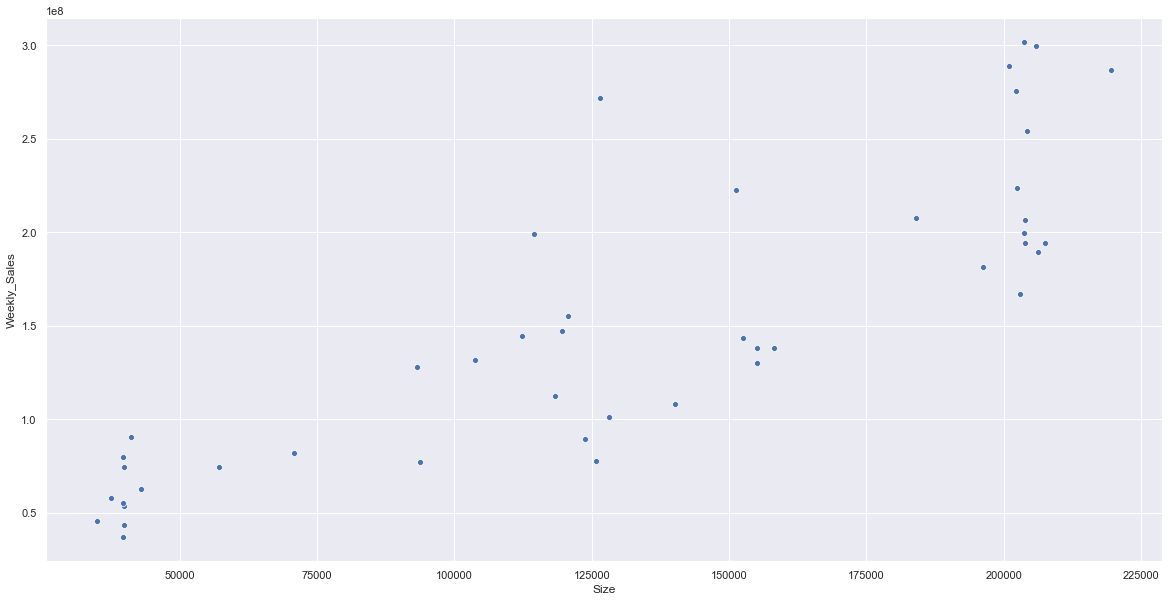

In [29]:
sns.scatterplot(x='Size', y='Weekly_Sales', 
                data=df.groupby(['Store', 'Size']).sum().reset_index())

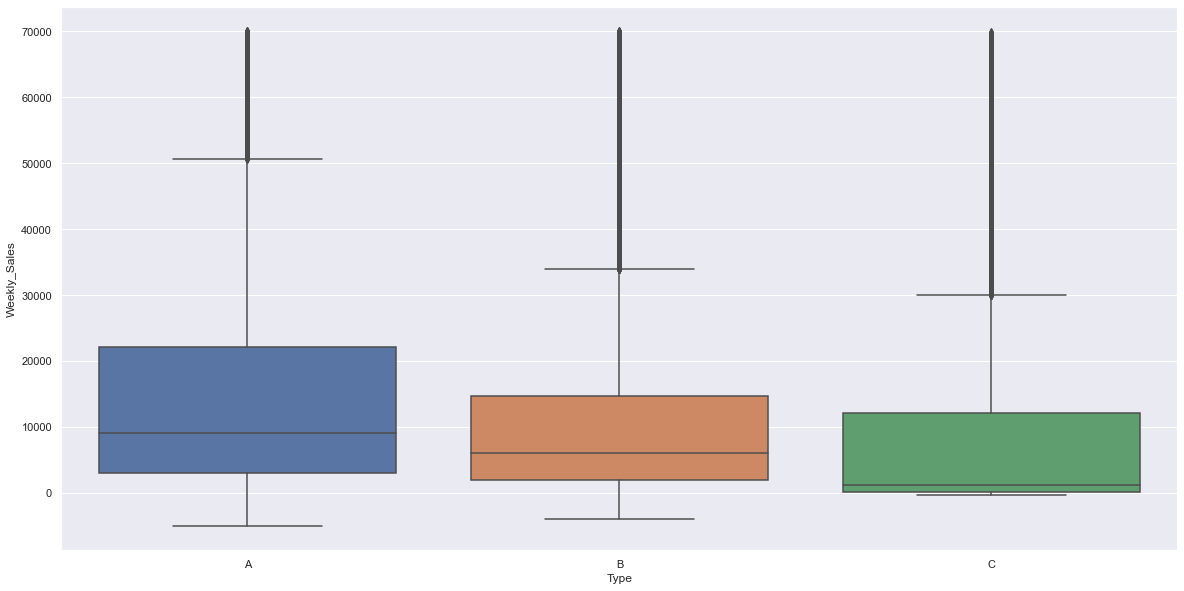

In [30]:
sns.boxplot(x='Type', y='Weekly_Sales', data=train[train.Weekly_Sales < 70000])

In [31]:
p80 = df[df.Type == 'A'].groupby(['Store']).sum()['Weekly_Sales'].quantile(0.8)

B = df[df.Type == 'B'].groupby(['Store']).sum().reset_index()
B[B.Weekly_Sales > p80]

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
4,10,454210,271617713.89,724.00,744204.88,36850.23,35467714.88,15189969.53,11403792.73,15865865.26,19748423.70,1327170.83,86346.92,1304971280,265988,66435,20743031


In [32]:
stores_total = df.groupby(['Store']).sum().reset_index()

In [33]:
p20 = stores_total.Weekly_Sales.quantile(.2)
p40 = stores_total.Weekly_Sales.quantile(.4)
p60 = stores_total.Weekly_Sales.quantile(.6)
p80 = stores_total.Weekly_Sales.quantile(.8)

In [34]:
stores_total['Total_Sales_Store_Type'] = 1

stores_total.loc[stores_total.Weekly_Sales >= p20, 'Total_Sales_Store_Type'] = 2
stores_total.loc[stores_total.Weekly_Sales >= p40, 'Total_Sales_Store_Type'] = 3
stores_total.loc[stores_total.Weekly_Sales >= p60, 'Total_Sales_Store_Type'] = 4
stores_total.loc[stores_total.Weekly_Sales >= p80, 'Total_Sales_Store_Type'] = 5

stores_total

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year,Total_Sales_Store_Type
0,1,454749,222402808.85,723.00,698891.40,32973.50,29573172.77,8946002.16,4468507.74,13732804.50,18386470.50,2212658.16,77966.25,1550070860,264713,66107,20600316,5
1,2,455425,275382440.98,722.00,697263.44,32965.32,39058007.29,16088974.79,6226127.85,17427365.75,23984630.72,2207843.84,78047.13,2071219066,264151,65969,20588271,5
2,3,370825,57586735.07,633.00,644254.39,29087.90,9983368.61,2659078.45,2607992.20,2870236.34,4116018.04,1982524.09,64838.74,337874112,233500,58305,18171084,1
3,4,457340,299543953.38,727.00,638680.78,33037.19,34440267.52,14186418.01,7054847.27,18897288.62,25044270.57,1321801.68,61281.20,2114624736,264966,66176,20656634,5
4,5,371526,45475688.90,640.00,622763.37,28984.99,9711211.82,2701165.39,2116352.74,3555011.57,8236390.98,1948972.07,56662.65,313840125,232318,58011,18096690,1
5,6,453812,223756130.64,721.00,711093.38,32889.40,30781300.32,12819197.58,6812203.29,13598176.50,20557473.78,2221555.66,67456.04,2067778555,263365,65777,20533985,5
6,7,432878,81598275.14,691.00,386602.68,31628.73,22528699.42,4387009.96,3043294.96,6038559.31,12455696.09,1890623.53,83808.48,690300306,252014,62935,19631047,2
7,8,432217,129951181.13,696.00,617917.36,31854.52,24957265.11,7973160.77,3668320.89,5996863.33,20309273.71,2171343.70,60279.69,1534496810,255493,63808,19898493,3
8,9,355292,77789218.99,625.00,599822.28,28586.44,10276462.80,2490823.05,3095154.04,3208143.21,11946475.58,1947934.85,54050.06,1115761211,229032,57191,17831310,2
9,10,454210,271617713.89,724.00,744204.88,36850.23,35467714.88,15189969.53,11403792.73,15865865.26,19748423.70,1327170.83,86346.92,1304971280,265988,66435,20743031,5


In [35]:
print(f'Type 1: {len(stores_total[stores_total.Total_Sales_Store_Type == 1])}')
print(f'Type 2: {len(stores_total[stores_total.Total_Sales_Store_Type == 2])}')
print(f'Type 3: {len(stores_total[stores_total.Total_Sales_Store_Type == 3])}')
print(f'Type 4: {len(stores_total[stores_total.Total_Sales_Store_Type == 4])}')
print(f'Type 5: {len(stores_total[stores_total.Total_Sales_Store_Type == 5])}')

Type 1: 9
Type 2: 9
Type 3: 9
Type 4: 9
Type 5: 9


In [36]:
train_dates = train[['Week', 'Year', 'IsHoliday']].drop_duplicates()
len(train_dates[train_dates.IsHoliday])

8

In [37]:
test_dates = test[['Week', 'Year', 'IsHoliday']].drop_duplicates()
len(test_dates[test_dates.IsHoliday])

2

In [38]:
super_bowl = pd.to_datetime(['2010-02-12T00:00:00', '2011-02-11 00:00:00', '2012-02-10 00:00:00', '2013-02-08 00:00:00'], errors='coerce')
black_friday = pd.to_datetime(['2010-11-26 00:00:00', '2011-11-25 00:00:00', '2012-11-23 00:00:00', '2013-11-29 00:00:00'], errors='coerce')
christmas = pd.to_datetime(['2010-12-31 00:00:00', '2011-12-30 00:00:00', '2012-12-28 00:00:00', '2013-12-27 00:00:00'], errors='coerce')

In [39]:
train['Regular_Weeks'] = True
train['Is_SuperBowl'] = False
train['Is_BlackFriday'] = False
train['Is_Christmas'] = False
train['Other_Holidays'] = False

In [40]:
train.loc[train.IsHoliday, 'Regular_Weeks'] = False
train.loc[train.Date.isin(black_friday), 'Is_BlackFriday'] = True
train.loc[train.Date.isin(christmas), 'Is_Christmas'] = True
train.loc[train.Date.isin(super_bowl), 'Is_SuperBowl'] = True

train.loc[train.IsHoliday \
          & (train.Date.isin(super_bowl) == False) \
          & (train.Date.isin(black_friday) == False)
          & (train.Date.isin(christmas) == False), 'Other_Holidays'] = True

train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Week,Month,Year,Regular_Weeks,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_Holidays
0,1,1,2010-02-05,24924.50,False,42.31,2.57,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.57,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.57,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.57,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.57,nan,nan,nan,...,A,151315,5,2,2010,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418931,45,93,2012-01-27,1397.34,False,37.93,3.57,1890.49,2618.49,nan,...,B,118221,4,1,2012,True,False,False,False,False
418932,45,94,2012-01-27,3904.32,False,37.93,3.57,1890.49,2618.49,nan,...,B,118221,4,1,2012,True,False,False,False,False
418933,45,95,2012-01-27,44521.65,False,37.93,3.57,1890.49,2618.49,nan,...,B,118221,4,1,2012,True,False,False,False,False
418934,45,97,2012-01-27,5724.94,False,37.93,3.57,1890.49,2618.49,nan,...,B,118221,4,1,2012,True,False,False,False,False


In [41]:
oh = train[train.Other_Holidays]
len(oh.groupby(["Date"]))

2

In [42]:
w_sales_2011 = train[train.Year == 2011]

bf_sales = w_sales_2011[w_sales_2011.Is_BlackFriday]
sb_sales = w_sales_2011[w_sales_2011.Is_SuperBowl]
ch_sales = w_sales_2011[w_sales_2011.Is_Christmas]

In [43]:
sales_2011 = w_sales_2011.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
bf_sales = bf_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
sb_sales = sb_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()
ch_sales = ch_sales.groupby(['Store']).agg(Sales=('Weekly_Sales', 'sum')).reset_index()

In [44]:
sales_2011 = sales_2011.merge(bf_sales, on=['Store'], suffixes=['', '_BF'])
sales_2011 = sales_2011.merge(sb_sales, on=['Store'], suffixes=['', '_SB'])
sales_2011 = sales_2011.merge(ch_sales, on=['Store'], suffixes=['', '_CH'])

sales_2011

,Store,Sales,Sales_BF,Sales_SB,Sales_CH
0,1,80921918.83,2033320.66,1649614.93,1497462.72
1,2,98607881.42,2614202.30,2168041.61,1874226.52
2,3,20816876.57,556925.19,430526.21,410553.88
3,4,111092293.33,3004702.33,2187847.29,2007105.86
4,5,16470820.00,507900.07,311590.54,349624.88
5,6,80528762.95,2249811.55,1486920.17,1598080.52
6,7,30662640.52,949075.87,559903.13,815915.52
7,8,47512786.16,1235163.86,996147.39,858572.22
8,9,28685969.65,814753.50,555279.02,549788.36
9,10,98916894.74,2950198.64,2115408.31,1930690.37


In [45]:
top_10_sales_2011 = sales_2011.sort_values(['Sales'], ascending=False).head(10)

In [46]:
print(f'BlackFriday: {top_10_sales_2011.Sales_BF.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')
print(f'SuperBowl: {top_10_sales_2011.Sales_SB.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')
print(f'Christmas: {top_10_sales_2011.Sales_CH.sum() * 100 / top_10_sales_2011.Sales.sum():.2f}%')

BlackFriday: 2.73%
SuperBowl: 1.94%
Christmas: 1.88%


In [47]:
low_10_sales_2011 = sales_2011.sort_values(['Sales']).head(10)

print(f'BlackFriday: {low_10_sales_2011.Sales_BF.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')
print(f'Christmas: {low_10_sales_2011.Sales_CH.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')
print(f'SuperBowl: {low_10_sales_2011.Sales_SB.sum() * 100 / low_10_sales_2011.Sales.sum():.2f}%')


BlackFriday: 2.37%
Christmas: 1.87%
SuperBowl: 1.97%


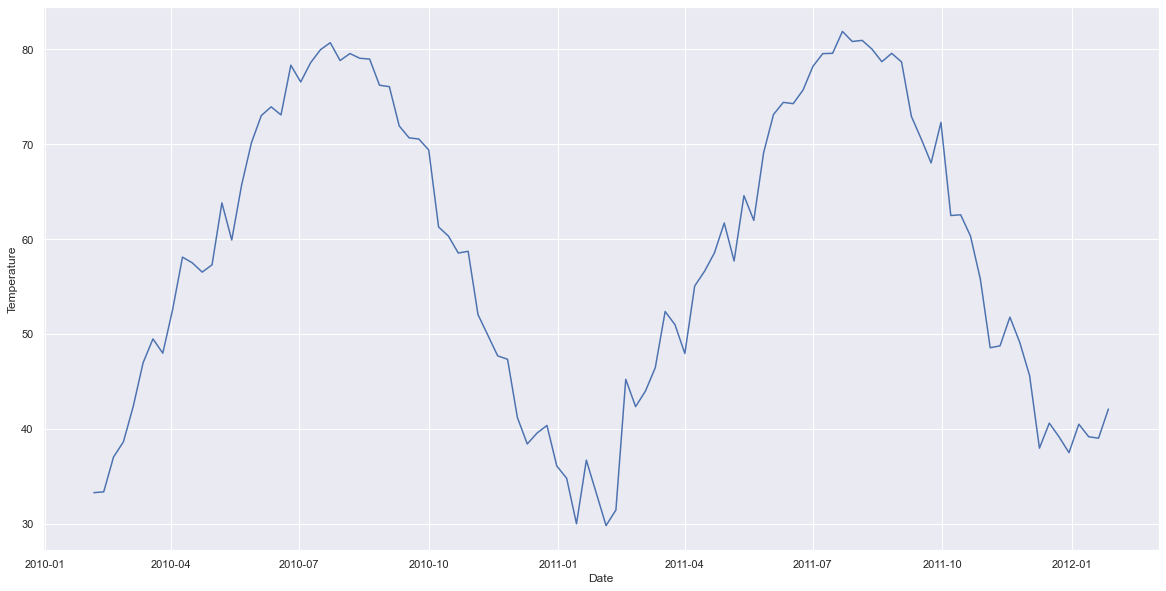

In [48]:
sns.lineplot(x='Date', y='Temperature', data=train.groupby(['Date']).mean().reset_index())

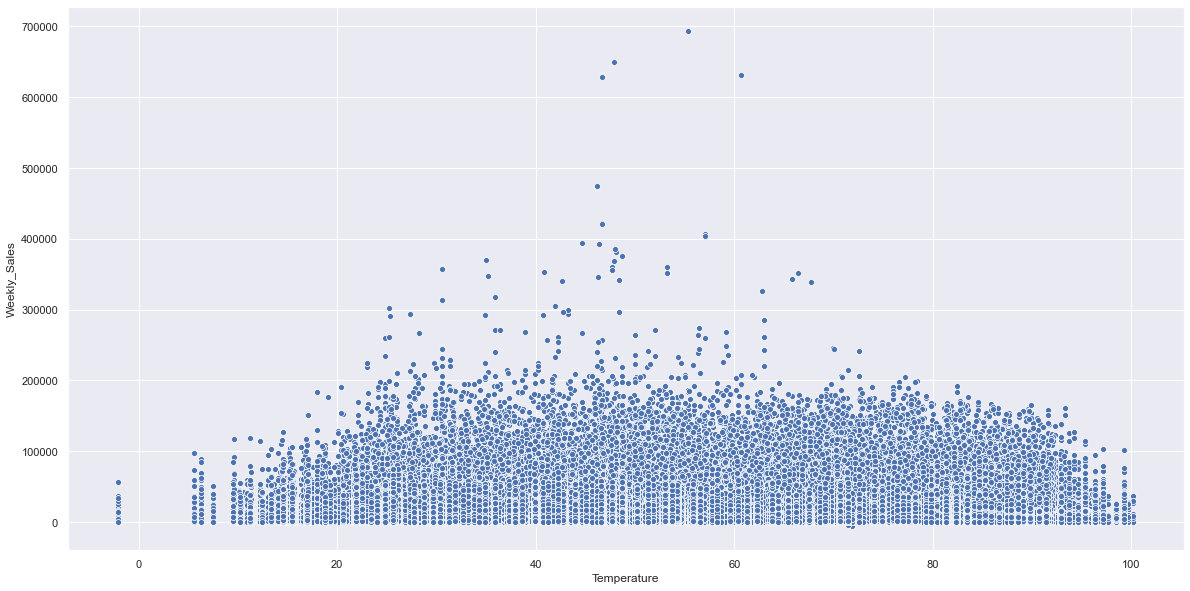

In [49]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train)

In [50]:
train[['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00,-0.00
Temperature,-0.00,1.00


In [51]:
july_2010 = train[(train.Month == 7) & (train.Year == 2010)]
july_2010 = july_2010.groupby(['Store']).agg(min_temp=('Temperature', 'min'), \
                                             max_temp=('Temperature', 'max')).reset_index()

In [52]:
july_2010['delta_temp'] = july_2010.max_temp - july_2010.min_temp
july_2010.sort_values(['delta_temp'], ascending=False).head(2)
july_2010

,Store,min_temp,max_temp,delta_temp
0,1,80.48,83.36,2.88
1,2,82.59,87.66,5.07
2,3,81.75,84.32,2.57
3,4,73.66,80.70,7.04
4,5,81.14,83.98,2.84
5,6,80.34,83.90,3.56
6,7,58.00,66.07,8.07
7,8,72.49,78.29,5.80
8,9,78.51,84.49,5.98
9,10,85.03,92.89,7.86


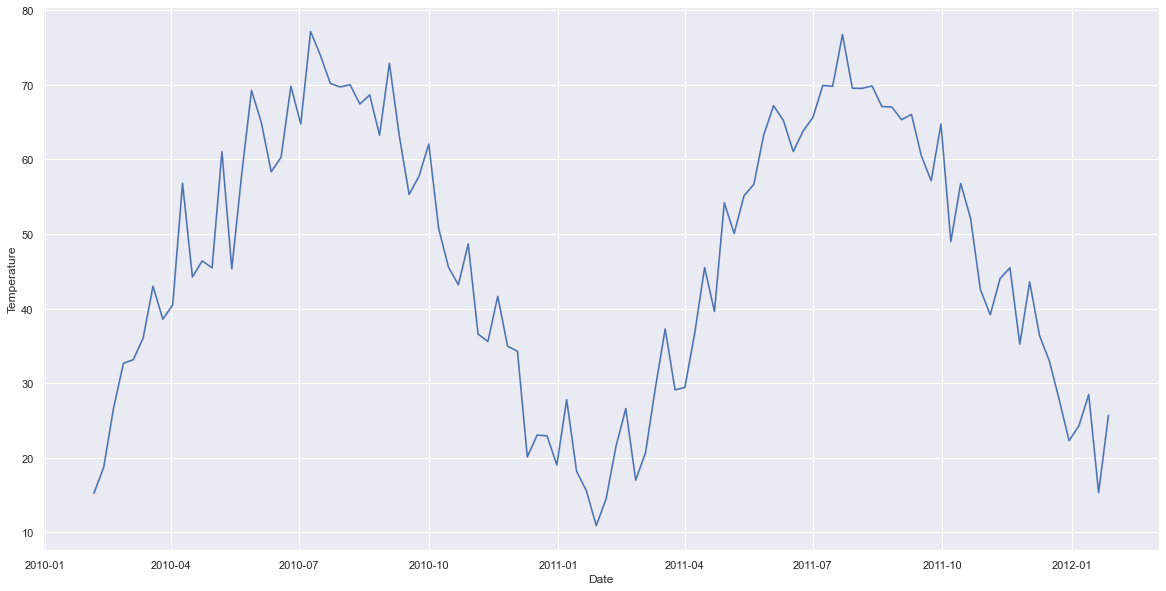

In [53]:
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 23])

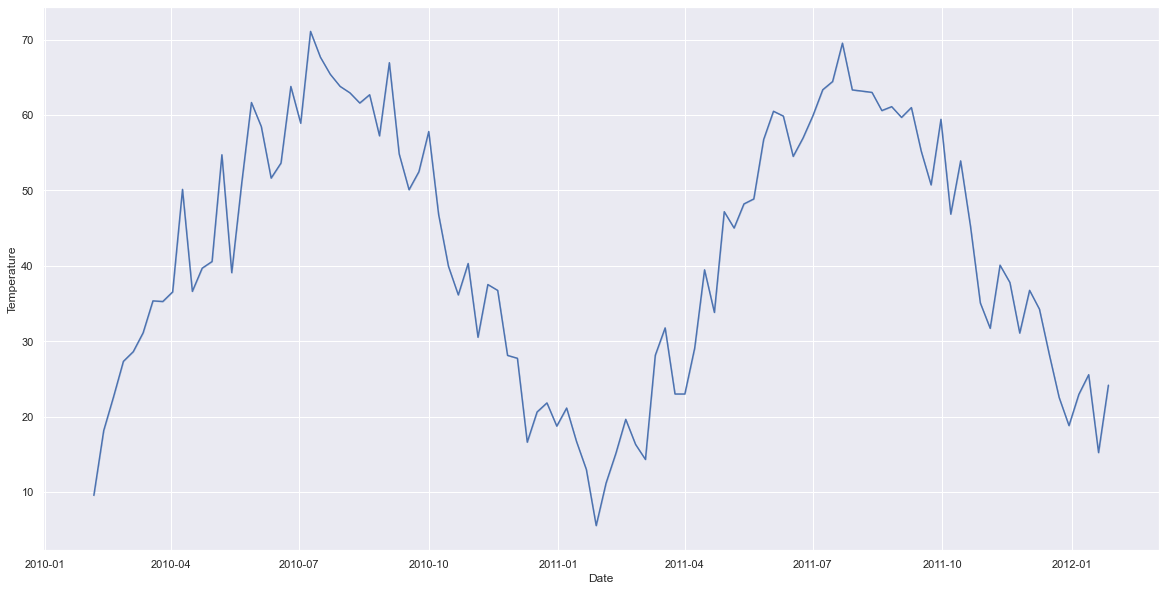

In [54]:
sns.lineplot(x='Date', y='Temperature', data=train[train.Store == 26])

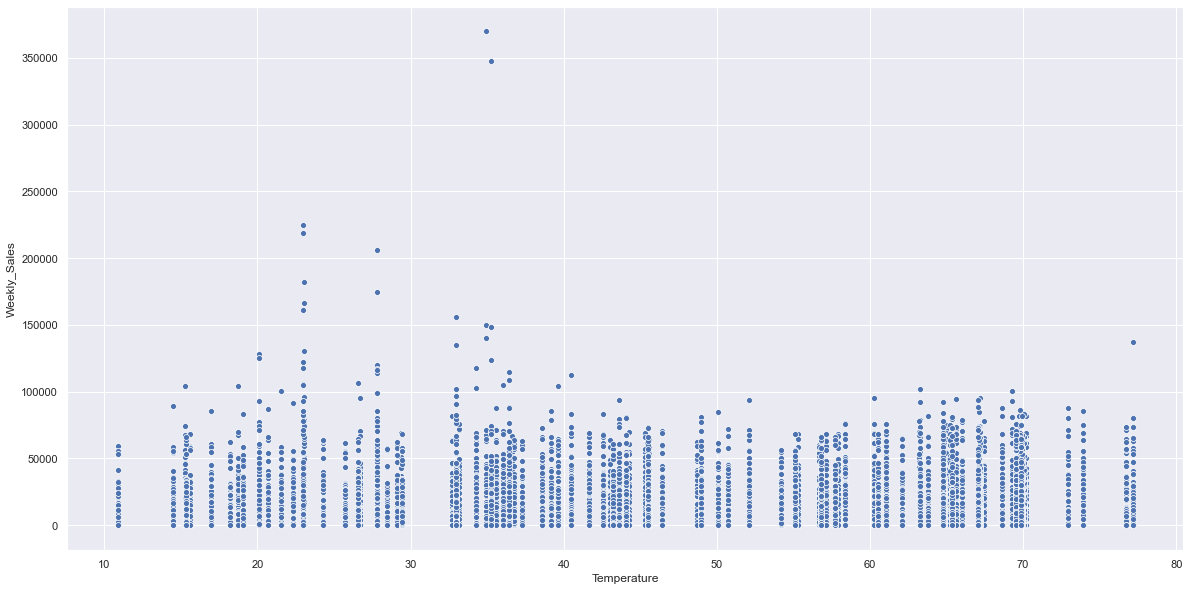

In [55]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 23])

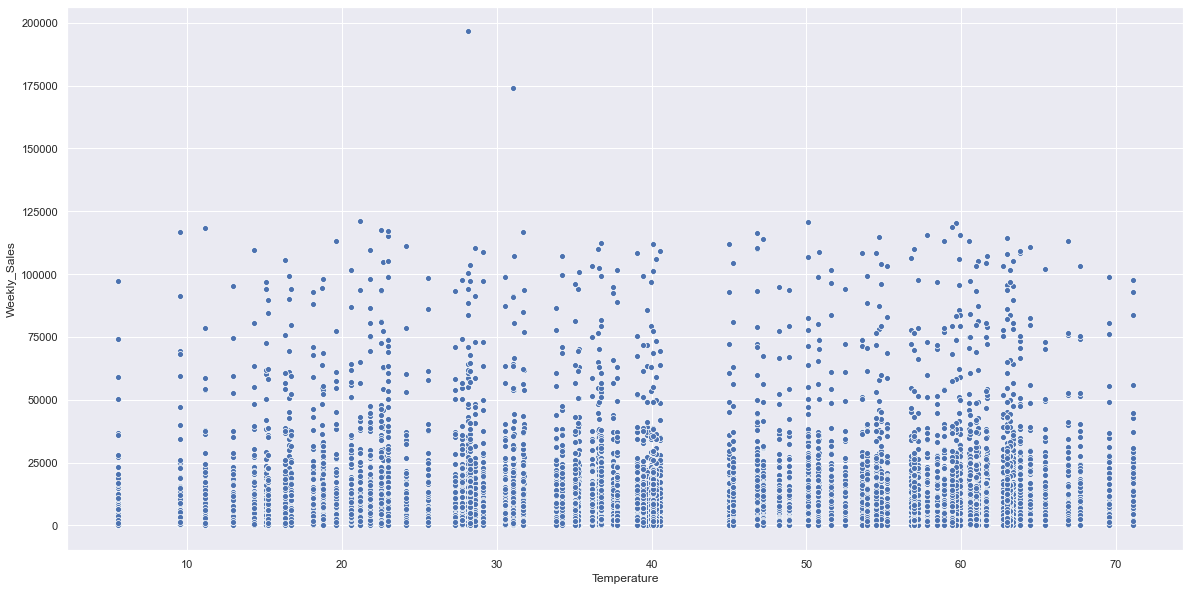

In [56]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=train[train.Store == 26])

In [57]:
train[train.Store == 23][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00,-0.00
Temperature,-0.00,1.00


In [58]:
train[train.Store == 26][['Weekly_Sales', 'Temperature']].corr()

,Weekly_Sales,Temperature
Weekly_Sales,1.00,0.02
Temperature,0.02,1.00


In [59]:
atm = train.groupby(['Store', 'Month', 'Year']).agg(Average_Temperature_Month=('Temperature', 'mean')).reset_index()
atm

,Store,Month,Year,Average_Temperature_Month
0,1,1,2011,42.91
1,1,1,2012,51.48
2,1,2,2010,41.84
3,1,2,2011,49.76
4,1,3,2010,52.58
...,...,...,...,...
1075,45,10,2011,57.78
1076,45,11,2010,46.99
1077,45,11,2011,47.90
1078,45,12,2010,32.46


In [60]:
train = train.merge(atm, on=['Store', 'Month', 'Year'])

In [61]:
train = train.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Month,Year,Regular_Weeks,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_Holidays,Average_Temperature_Month
0,1,1,2010-02-05,24924.50,False,A,151315,5,2,2010,True,False,False,False,False,41.84
1,1,2,2010-02-05,50605.27,False,A,151315,5,2,2010,True,False,False,False,False,41.84
2,1,3,2010-02-05,13740.12,False,A,151315,5,2,2010,True,False,False,False,False,41.84
3,1,4,2010-02-05,39954.04,False,A,151315,5,2,2010,True,False,False,False,False,41.84
4,1,5,2010-02-05,32229.38,False,A,151315,5,2,2010,True,False,False,False,False,41.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,2012-01-27,1397.34,False,B,118221,4,1,2012,True,False,False,False,False,36.67
305978,45,94,2012-01-27,3904.32,False,B,118221,4,1,2012,True,False,False,False,False,36.67
305979,45,95,2012-01-27,44521.65,False,B,118221,4,1,2012,True,False,False,False,False,36.67
305980,45,97,2012-01-27,5724.94,False,B,118221,4,1,2012,True,False,False,False,False,36.67


In [62]:
test = test.drop(['Fuel_Price', 'CPI', 'Unemployment', 'Temperature', \
                  'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

test

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Month,Year
7455,1,1,2012-02-03,23510.49,False,A,151315,5,2,2012
7456,1,2,2012-02-03,54322.24,False,A,151315,5,2,2012
7457,1,3,2012-02-03,12485.78,False,A,151315,5,2,2012
7458,1,4,2012-02-03,40274.83,False,A,151315,5,2,2012
7459,1,5,2012-02-03,28307.43,False,A,151315,5,2,2012
...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,B,118221,43,10,2012


In [63]:
train['sample_weights'] = train.Regular_Weeks.apply(lambda rw: 1 if rw else 5)
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Week,Month,Year,Regular_Weeks,Is_SuperBowl,Is_BlackFriday,Is_Christmas,Other_Holidays,Average_Temperature_Month,sample_weights
0,1,1,2010-02-05,24924.50,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
1,1,2,2010-02-05,50605.27,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
2,1,3,2010-02-05,13740.12,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
3,1,4,2010-02-05,39954.04,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
4,1,5,2010-02-05,32229.38,False,A,151315,5,2,2010,True,False,False,False,False,41.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305977,45,93,2012-01-27,1397.34,False,B,118221,4,1,2012,True,False,False,False,False,36.67,1
305978,45,94,2012-01-27,3904.32,False,B,118221,4,1,2012,True,False,False,False,False,36.67,1
305979,45,95,2012-01-27,44521.65,False,B,118221,4,1,2012,True,False,False,False,False,36.67,1
305980,45,97,2012-01-27,5724.94,False,B,118221,4,1,2012,True,False,False,False,False,36.67,1
